In [1]:
import pandas as pd
from pandas import read_excel
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
df = pd.read_excel('transaction.xlsx')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [4]:
df.drop(df.columns[13:26], axis=1, inplace=True)  #Dropping all the nan columns from the dataframe using slicing
df.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0
19999,20000,11,1144,2017-09-22,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,36334.0


In [5]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [6]:
df.shape

(20000, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [8]:
df.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [9]:
print(df['online_order'].unique())
print(df['order_status'].unique())
print(df['brand'].unique())
print(df['product_line'].unique())
print(df['product_class'].unique())
print(df['product_size'].unique())

[ 0.  1. nan]
['Approved' 'Cancelled']
['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
['Standard' 'Road' 'Mountain' 'Touring' nan]
['medium' 'low' 'high' nan]
['medium' 'large' 'small' nan]


In [10]:
df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [11]:
df.dropna(subset=['brand'],inplace=True)

In [12]:
df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               358
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
dtype: int64

In [13]:
df['online_order'].unique()

array([ 0.,  1., nan])

#df.dropna(subset = ["online_order"], inplace=True)# If column2 contains NaN, remove that row.

#then there are no nan values of online order column but 195 each nan values from brand column to prod last sold column

<AxesSubplot:xlabel='standard_cost', ylabel='Count'>

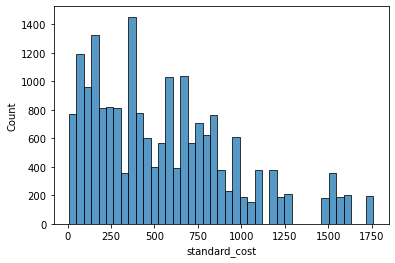

In [14]:
sns.histplot(df['standard_cost'])

In [15]:
df['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B'], dtype=object)

In [16]:
df['product_line'].unique()

array(['Standard', 'Road', 'Mountain', 'Touring'], dtype=object)

In [17]:
df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,19803.000000,19803.000000,19803.000000,19445.000000,19803.000000,19803.000000,19803.000000
mean,9993.979650,45.815937,1739.294955,0.500849,1107.997866,556.046951,38199.776549
std,5776.499961,30.569841,1011.946353,0.500012,582.770460,405.955660,2875.201110
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,4988.500000,18.000000,858.000000,0.000000,575.270000,215.140000,35667.000000
50%,9995.000000,45.000000,1738.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.500000,72.000000,2615.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.000000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [18]:
date=df['transaction_date']

In [19]:
print(date.max())
print(date.min())

2017-12-30 00:00:00
2017-01-01 00:00:00


In [20]:
df.shape

(19803, 13)

In [21]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [22]:
print(df['product_class'].unique())
print(df['product_size'].unique())

['medium' 'low' 'high']
['medium' 'large' 'small']


In [23]:
df['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [24]:
data=df[['online_order','order_status','list_price','standard_cost','product_first_sold_date']]

In [25]:
data

,online_order,order_status,list_price,standard_cost,product_first_sold_date
0,0.0,Approved,71.49,53.62,41245.0
1,1.0,Approved,2091.47,388.92,41701.0
2,0.0,Approved,1793.43,248.82,36361.0
3,0.0,Approved,1198.46,381.10,36145.0
4,1.0,Approved,1765.30,709.48,42226.0
...,...,...,...,...,...
19995,1.0,Approved,2005.66,1203.40,37823.0
19996,1.0,Approved,416.98,312.74,35560.0
19997,1.0,Approved,1636.90,44.71,40410.0
19998,0.0,Approved,227.88,136.73,38216.0


In [26]:
data.isnull().sum()

online_order               358
order_status                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
dtype: int64

In [27]:
box=df[['list_price','standard_cost']]

<AxesSubplot:>

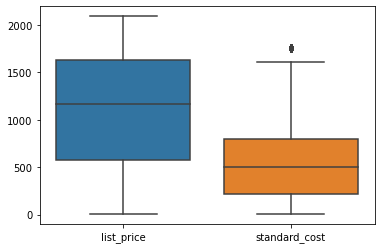

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(data=box)

<AxesSubplot:>

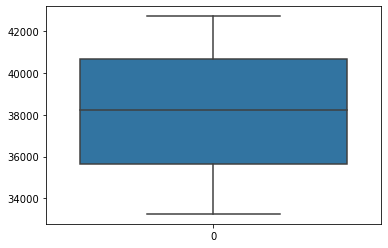

In [29]:
sns.boxplot(data=df['product_first_sold_date'])

In [30]:
sc=df['standard_cost']

In [31]:
z_scores = stats.zscore(sc)
abs_z_scores = np.abs(z_scores)
filtered_entries =(abs_z_scores < 3)
data= data[filtered_entries]

In [32]:
data.shape


#no change means no significant outliers

(19803, 5)

In [33]:
contradiction=data[(data['online_order'] == 0.0) & (data['order_status'] =='Approved')]

In [34]:
contradiction

,online_order,order_status,list_price,standard_cost,product_first_sold_date
0,0.0,Approved,71.49,53.62,41245.0
2,0.0,Approved,1793.43,248.82,36361.0
3,0.0,Approved,1198.46,381.10,36145.0
7,0.0,Approved,1292.84,13.44,39915.0
8,0.0,Approved,1071.23,380.74,33455.0
...,...,...,...,...,...
19990,0.0,Approved,1765.30,709.48,42218.0
19991,0.0,Approved,1274.93,764.96,39298.0
19992,0.0,Approved,1163.89,589.27,39880.0
19993,0.0,Approved,1240.31,795.10,40553.0


# end

In [35]:
#tf= pd.read_excel('customerlist.xlsx')
#tf.head()

In [36]:
#tf.isnull().sum()

In [37]:
#tf.nunique()

In [38]:
#tf.columns

In [39]:
#len(tf['Rank'].unique())

In [40]:
#new_tf=tf[['past_3_years_bike_related_purchases','property_valuation','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
#       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value']]

In [41]:
#new_tf

In [42]:
#plt.boxplot(new_tf['property_valuation'])

In [43]:
#new_tf.describe()

In [44]:
#new_tf.tail()

# end

In [45]:
dem= pd.read_excel('demographic.xlsx')
dem

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [46]:
dem.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [47]:
dem.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [48]:
dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [49]:
dem.dropna(subset = ["DOB"], inplace=True)# If column2 contains NaN, remove that row.

In [50]:
dem.isnull().sum()

customer_id                              0
first_name                               0
last_name                              121
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                215
owns_car                                 0
tenure                                   0
dtype: int64

In [51]:
dem['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [52]:
dem.head(8)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0


In [53]:
dob=dem['DOB']

In [54]:
print(max(dob))
print(min(dob))#there is an outlier in the datecolumn

2002-03-11 00:00:00
1843-12-21 00:00:00


<AxesSubplot:xlabel='DOB', ylabel='Count'>

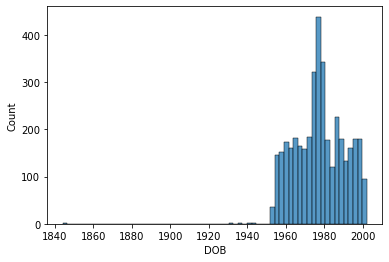

In [55]:
sns.histplot(dem['DOB'])

In [56]:
dob.nsmallest(2).iloc[-1]

Timestamp('1931-10-23 00:00:00')

In [57]:
dob.nlargest(3)

65     2002-03-11
1887   2002-01-26
3434   2002-01-15
Name: DOB, dtype: datetime64[ns]

In [58]:
Box=dem[['past_3_years_bike_related_purchases','tenure']]

<AxesSubplot:>

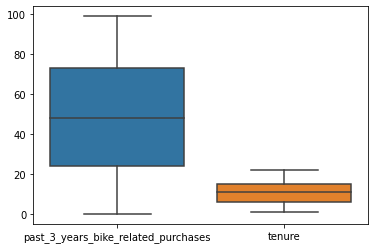

In [59]:
sns.boxplot(data=Box)

In [60]:
dem.shape

(3913, 13)

In [61]:
#dem['DOB'] = pd.to_datetime(dem['DOB'])

#to be done when the type of date is object and not datetime64

In [62]:
dob.min()

#clearly outlier for dob

Timestamp('1843-12-21 00:00:00')

In [63]:
dem.set_index('DOB',inplace=True)

In [64]:
dem

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
DOB,,,,,,,,,,,,
1953-10-12,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1980-12-16,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
1954-01-20,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
1961-10-03,4,Talbot,NaN,Male,33,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
1977-05-13,5,Sheila-kathryn,Calton,Female,56,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1975-12-12,3995,Rusty,Iapico,Male,93,Staff Scientist,Manufacturing,Mass Customer,N,á,Yes,14.0
1975-08-09,3996,Rosalia,Halgarth,Female,8,VP Product Management,Health,Mass Customer,N,-100,No,19.0
2001-07-13,3997,Blanch,Nisuis,Female,87,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0


In [65]:
dem=dem.drop(pd.to_datetime('1843-12-21'))

In [66]:
dem

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
DOB,,,,,,,,,,,,
1953-10-12,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1980-12-16,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
1954-01-20,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
1961-10-03,4,Talbot,NaN,Male,33,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
1977-05-13,5,Sheila-kathryn,Calton,Female,56,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1975-12-12,3995,Rusty,Iapico,Male,93,Staff Scientist,Manufacturing,Mass Customer,N,á,Yes,14.0
1975-08-09,3996,Rosalia,Halgarth,Female,8,VP Product Management,Health,Mass Customer,N,-100,No,19.0
2001-07-13,3997,Blanch,Nisuis,Female,87,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0


In [67]:
dem.reset_index(inplace=True)

In [68]:
dem

,DOB,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1953-10-12,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,1980-12-16,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,1954-01-20,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,1961-10-03,4,Talbot,NaN,Male,33,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,1977-05-13,5,Sheila-kathryn,Calton,Female,56,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,1975-12-12,3995,Rusty,Iapico,Male,93,Staff Scientist,Manufacturing,Mass Customer,N,á,Yes,14.0
3908,1975-08-09,3996,Rosalia,Halgarth,Female,8,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3909,2001-07-13,3997,Blanch,Nisuis,Female,87,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3910,1973-10-24,3999,Patrizius,NaN,Male,11,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [69]:
dem.isnull().sum()

DOB                                      0
customer_id                              0
first_name                               0
last_name                              121
gender                                   0
past_3_years_bike_related_purchases      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                214
owns_car                                 0
tenure                                   0
dtype: int64

<AxesSubplot:xlabel='DOB', ylabel='Count'>

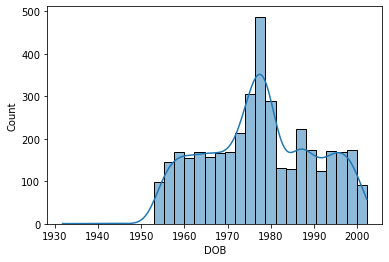

In [70]:
sns.histplot(dem['DOB'],kde=True)
 #after removal

In [71]:
new=dem[['past_3_years_bike_related_purchases','tenure']]
new

,past_3_years_bike_related_purchases,tenure
0,93,11.0
1,81,16.0
2,61,15.0
3,33,7.0
4,56,8.0
...,...,...
3907,93,14.0
3908,8,19.0
3909,87,1.0
3910,11,10.0


<AxesSubplot:xlabel='tenure', ylabel='Count'>

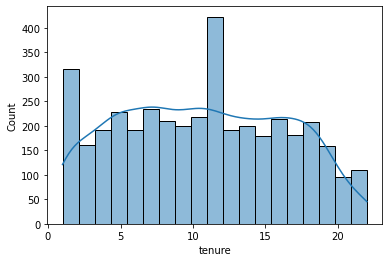

In [72]:
sns.histplot(new['tenure'],kde=True)

<AxesSubplot:xlabel='past_3_years_bike_related_purchases', ylabel='Count'>

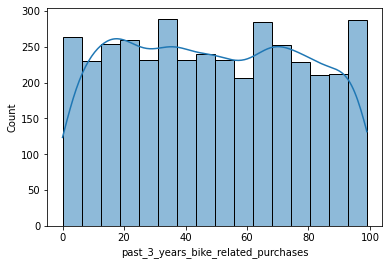

In [73]:
sns.histplot(new['past_3_years_bike_related_purchases'],kde=True)

# end

In [83]:
addr= pd.read_excel('address.xlsx')
addr.head(50)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
5,7,4 Delaware Trail,2210,New South Wales,Australia,9
6,8,49 Londonderry Lane,2650,New South Wales,Australia,4
7,9,97736 7th Trail,2023,New South Wales,Australia,12
8,11,93405 Ludington Park,3044,VIC,Australia,8
9,12,44339 Golden Leaf Alley,4557,QLD,Australia,4


In [75]:
addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [76]:
addr.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [77]:
addr.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [78]:
addr['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

<AxesSubplot:>

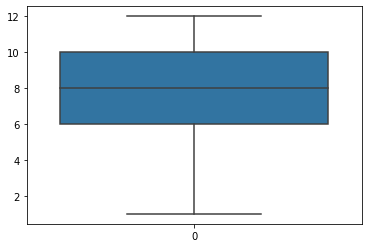

In [79]:
sns.boxplot(data=addr['property_valuation'])

In [80]:
addr.duplicated(subset=['address']).unique()

array([False,  True])